# Анализ и обработка результатов

В анализе данных важно наглядное представление результатов, чтобы их мог оценить заказчик. Это бизнес, где на кону громадный трафик, серверные мощности, личное время многотысячной аудитории. И одновременно это исследование.

Как в настоящей экспериментальной науке, ответ непредсказуем. Его точность зависит от умелого владения статистическими методами и от качества исходных данных. Перед тем, как начинать считать, проверьте, грамотно ли ваши данные подготовлены.

# Группировка данных

Слово «анализ» означает разбор, рассмотрение с разных сторон. Анализ данных начинают с разделения их на группы по какому-нибудь признаку. Эта операция называется группировка данных. Она помогает изучить материал более подробно, чтобы затем перейти к поиску взаимосвязей между отдельными группами.


Группировка оправданна, если данные чётко делятся по значимому признаку, а полученные группы близки к теме задачи. Например, когда есть данные обо всех покупках в супермаркете, можно смело заниматься группировкой. Так можно установить время наплыва покупателей и решить проблему пиковых нагрузок. Или посчитать средний чек — обычно для магазинов это ключевая метрика.


Стадии группировки хорошо укладываются в словесную формулу **split-apply-combine**:

•	разделить, **split** — разбиение на группы по определённому критерию;

•	применить, **apply** — применение какого-либо метода к каждой группе в отдельности, например, подсчёт численности группы методом count() или суммирование вызовом sum();

•	объединить, **combine** — сведение результатов в новую структуру данных, в зависимости от условий разделения и выполнения метода это бывает DataFrame и Series.

На картинке изображен принцип **split-apply-combine** для таблицы с экзопланетами. Посмотрим, как вообще идут дела с поиском экзопланет. Сначала данные делят по группам, где каждая группа — это год. Потом метод **count()** подсчитывает численность каждой группы. В итоге получаем новую структуру данных с группами, где каждая содержит год и число открытых за этот год экзопланет.


В Рandas для группировки данных есть метод **groupby()**. Он принимает как аргумент название столбца, по которому нужно группировать. В случае с делением экзопланет по годам открытия:

**print(exoplanet.groupby('discovered'))**

**<pandas.core.groupby.DataFrameGroupBy object at 0x7fc1e1ca3400>**


Применение метода **groupby()** к объекту типа DataFrame приводит к созданию объекта особого типа — **DataFrameGroupBy**. Это сгруппированные данные. Если применить к ним какой-нибудь метод Pandas, они станут новой структурой данных типа **DataFrame** или **Series**.
Подсчитаем сгруппированные по годам экзопланеты методом **count()**:

Если нужно сравнить наблюдения по одному показателю, метод применяют к **DataFrameGroupBy** с указанием на один столбец. Нас в первую очередь интересует радиус экзопланет: мы ищем другую Землю. Давайте получим таблицу с единственным столбцом 'radius':

**exo_number = exoplanet.groupby('discovered')['radius'].count()**

**print(exo_number)**

Получили Series, где по годам открытия расписано количество экзопланет, для которых удалось установить радиус.

Посмотрим, как меняется средний радиус открытых экзопланет год от года. Для этого надо сложить радиусы планет, открытых за определённый год, и поделить на их количество (которое мы уже нашли).

Сумма радиусов считается методом **sum()**:

**exo_radius_sum = exoplanet.groupby('discovered')['radius'].sum()**


**print(exo_radius_sum)**



## Задача
Вашему вниманию предлагается датасет с обзором показателей самоубийств с 1985 по 2016 год — Сравнение социально-экономической информации с показателями самоубийств по годам и странам.

Столбцами этой таблицы являются: страна, год, пол, возрастная группа, количество самоубийств, население, уровень самоубийств, сводный ключ по стране за год, ИЧР (индекс человеческого развития) за год, ВВП за год, ВВП на душу населения, поколение (на основе среднего по возрастной группе).

1. Загрузите таблицу master, содержащую данные о самоубийствах. Выведите на экран таблицу и оцените данные, обратите внимание на названия столбцов, переименуйте их, если это необходимо.

2. Убедитесь в том, что данные прошли предподготовку.  Пропущенные и неопределённые значения выявляет метод isna(), а суммарное количество таких значений — метод sum().

3. Сгруппируйте DataFrame по столбцу country, сохраните полученный результат в переменной country_grouping.

4. Посчитайте количество случаев самоубийств по странам, которые были совершены, методом **sum()**, указав, что выбираем один столбец suicides_no.

Сохраните результат в переменной country_sum и выведите первые 30 строк этой таблицы.



In [1]:
import pandas as pd

master = pd.read_csv("master.csv")

print(master.head())
print(master.columns.tolist())

master = master.rename(columns={
    "country": "country",
    "year": "year",
    "sex": "sex",
    "age": "age_group",
    "suicides_no": "suicides_no",
    "population": "population",
    "suicides/100k pop": "suicides_per_100k",
    "country-year": "country_year",
    "HDI for year": "hdi_year",
    " gdp_for_year ($) ": "gdp_for_year",
    "gdp_per_capita ($)": "gdp_per_capita",
    "generation": "generation"
})

print("\nСтолбцы после переименования:")
print(master.columns.tolist())

print("\nКоличество пропусков по каждому столбцу:")
print(master.isna().sum())

country_grouping = master.groupby("country")

country_sum = country_grouping["suicides_no"].sum()

print("\nСуммарное количество самоубийств по странам (30 первых):")
print(country_sum.head(30))


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

# Сортировка данных


Поиск необычного в группе — что среди планет, что среди меломанов — это прежде всего поиск чемпионов: объектов с выдающимися показателями по разным статьям. Как всю таблицу, так и отдельные группы изучают, сортируя строки по какому-либо столбцу.

В Pandas для этой операции есть метод **sort_values()**. У него два аргумента:

• **by = 'имя столбца'** — имя столбца, по которому нужно сортировать;

• **ascending:** по умолчанию True. Для сортировки по убыванию установите значение False.



Среди экзопланет интересны близкие по размерам к Земле. Есть ли такие? Отсортируем список по радиусу в порядке возрастания. Тогда в голове таблицы окажутся самые малые, на которых гравитация не прижмёт нас к полу.

**print(exoplanet.sort_values(by='radius').head(30))**

Оказывается, некоторые из уже открытых экзопланет по размерам близки не то что к Земле, но уже и к Луне! Получим список экзопланет с радиусом меньше земного. Смотрите, как логический оператор (здесь это <) задействуется в отборе элементов столбца. Дальше нам этот приём не раз понадобится.

**print(exoplanet[exoplanet['radius'] < 1])**

Но и этот список такой длинный, что изучать его лучше по частям. Экзопланеты, близкие по размерам к Земле, за последнее десятилетие открывали нередко. Можно изучать список открытых за каждый год. Например, для 2014 года (вновь обратите внимание на работу логического оператора, теперь это ==):

**print(exoplanet[exoplanet['discovered'] == 2014])**

А чтобы не тратить время на лишнее, поставим оба условия сразу. Для этого в Pandas есть логический оператор &, подобный оператору and языка Python. Напомним, его смысл на русском языке можно передать словами «и ещё»:

**exo_small_14 = exoplanet[ (exoplanet['radius']<1) & (exoplanet['discovered']==2014)]**

**print(exo_small_14)**

Отсортируем результат в порядке убывания радиуса.

**print(exo_small_14.sort_values(by = 'radius', ascending = False))**





## Задача
1. Выделим пятерки стран с самым низким и самым высоким уровнем самоубийств в мире.

5 стран с наименьшим количеством самоубийств:
country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                4
Antigua and Barbuda      11
Maldives                 20
Name: suicides_no, dtype: int64

5 стран с наибольшим количеством самоубийств:
country
Ukraine                319950
France                 329127
Japan                  806902
United States         1034013
Russian Federation    1209742
Name: suicides_no, dtype: int64


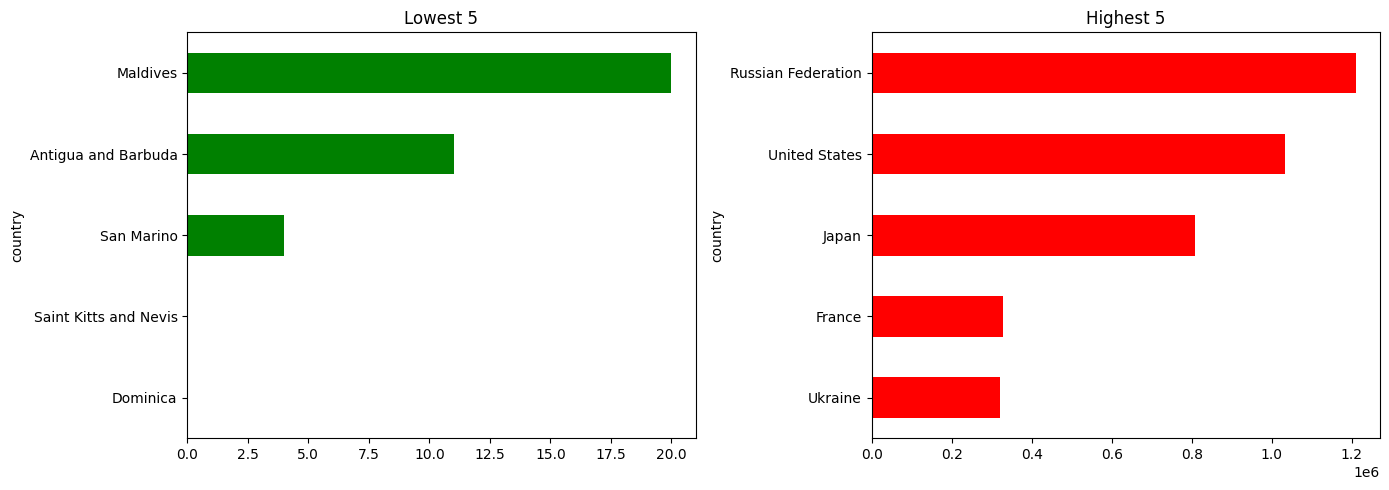

In [2]:

country_sorted = country_sum.sort_values()

lowest_5 = country_sorted.head(5)
print("5 стран с наименьшим количеством самоубийств:")
print(lowest_5)

highest_5 = country_sorted.tail(5)
print("\n5 стран с наибольшим количеством самоубийств:")
print(highest_5)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,5))

lowest_5.plot(kind="barh", ax=axes[0], color="green", title="Lowest 5")
highest_5.plot(kind="barh", ax=axes[1], color="red", title="Highest 5")

plt.tight_layout()
plt.show()


2. Исследуйте распределение количества суидидов по гендерному признаку. Найдите лидеров и антилидеров по количеству самоубийств среди женщин. Повторяется ли картина по сравнению с предыдущим исследованием?

5 стран с наименьшим количеством самоубийств среди женщин:
country
Dominica                 0
Saint Kitts and Nevis    0
San Marino               0
Oman                     0
Antigua and Barbuda      1
Name: suicides_no, dtype: int64

5 стран с наибольшим количеством самоубийств среди женщин:
country
Republic of Korea      82615
France                 89419
United States         213797
Russian Federation    214330
Japan                 251630
Name: suicides_no, dtype: int64


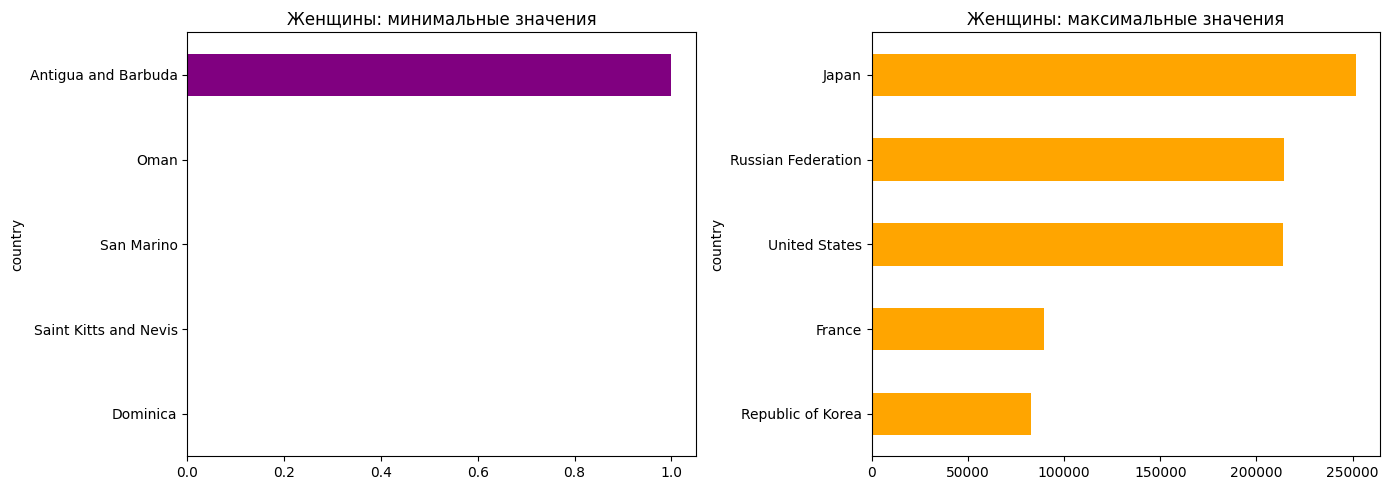

In [3]:
gender_grouping = master.groupby(["country", "sex"])["suicides_no"].sum()

female_suicides = gender_grouping.xs("female", level="sex")

female_sorted = female_suicides.sort_values()

female_lowest_5 = female_sorted.head(5)
print("5 стран с наименьшим количеством самоубийств среди женщин:")
print(female_lowest_5)

female_highest_5 = female_sorted.tail(5)
print("\n5 стран с наибольшим количеством самоубийств среди женщин:")
print(female_highest_5)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14,5))

female_lowest_5.plot(kind="barh", ax=axes[0], color="purple", title="Женщины: минимальные значения")
female_highest_5.plot(kind="barh", ax=axes[1], color="orange", title="Женщины: максимальные значения")

plt.tight_layout()
plt.show()


# Описательная статистика

Чтобы представить себе среднестатистического самоубийцу, понадобится описательная статистика.

Из её показателей для количественного описания данных в нашей задаче нужны четыре меры — максимум, минимум, медиана и среднее.

Наибольшее и наименьшее обычно вычисляют только по одному признаку. Например, можно получить минимальное и максимальное значение уровня самоубийств (количество самоубийств на 100 тыс.населения) (столбец 'suicides/100k pop'). Для поиска максимума вызывают метод max(), примененный к этому столбцу:

print(master['suicides/100k pop'].max())


In [5]:
print(master['suicides_per_100k'].max())

224.97


Самый высокий показатель оказался 224.97 самоубийств на 100 тыс.населения. Интересно, в какой стране такая ситуация.

Запросим из master строку с максимальным значением, прибегнув к логической индексации с условием

**master['suicides/100k pop'] == master['suicides/100k pop'].max()**

In [6]:
master['suicides_per_100k'] == master['suicides_per_100k'].max()

,suicides_per_100k
0,False
1,False
2,False
3,False
4,False
...,...
27815,False
27816,False
27817,False
27818,False


Минимальное значение — ищут методом **min()**. Нам интересно установить случаи, когда уровень суицидов минимальный, но не нулевой.

Вот как мы создаём выборку  и находим в ней минимальное значение:

**master_drop_null = master[master['suicides/100k pop'] != 0]**

**print(master_drop_null['suicides/100k pop'].min())**


In [7]:
master_drop_null = master[master['suicides_per_100k'] != 0]

print(master_drop_null['suicides_per_100k'].min())

0.02


Получим название самой "счастливой" страны. Как и при поиске максимума, воспользуемся условием и логической индексацией

In [9]:
country_sum = master.groupby("country")["suicides_no"].sum()

min_value = country_sum.min()
print("Минимальное количество самоубийств:", min_value)

happiest_country = country_sum[country_sum == min_value]

print("\nСамая 'счастливая' страна (или несколько):")
print(happiest_country)


Минимальное количество самоубийств: 0

Самая 'счастливая' страна (или несколько):
country
Dominica                 0
Saint Kitts and Nevis    0
Name: suicides_no, dtype: int64


Результат вывода — две страны, которые соответствуют минимальному значению.
На основе полученных данных можно сделать вывод, что число совершенных самоубийств на 100 тыс. населения  находится в диапазоне от 0,02 до 224.97 секунд, не включая пропущенные.

Это знание пригодится, чтобы разобраться с медианой и средним арифметическим.

Среднее и медиана оценивают значения в центре выборки. Если тех строк, где число с большим количеством самоубийц, столько же, сколько тех, где это число мало — среднее подойдет. Но когда есть оторванные от основной массы лидеры, их результаты сильно смещают значение среднего вверх. Вот почему оценивать в этом случае лучше медианой.


В геометрии медиана делит фигуру на две равные по площади. В статистике она делит выборку пополам: в одной половине значения меньше медианного, в другой больше. Логично, что для определения медианы список обязательно должен быть отсортирован — либо по возрастанию, либо по убыванию.
Когда количество значений нечётное, медиана будет равна тому значению, которое оказалось ровно посередине отсортированного набора. Если же количество данных чётное, то медиана рассчитывается как среднее арифметическое двух соседних чисел в середине набора.



В Pandas есть метод **median()**, который считает медиану. По аналогии с **min()** и **max()** его можно применять ко всей таблице, к отдельному столбцу или к сгруппированным данным. Теперь применим медиану ко всем значениям времени прослушивания в нашей таблице, исключив нулевые:



In [12]:
#Предположил что тут "ко всем значениям времени прослушивания" опечатка и речь все ещё идёт про дата сет со статистикой суицидов
master["suicides_no"] = pd.to_numeric(master["suicides_no"], errors="coerce")
median_suicides = master["suicides_no"].dropna().median()
print("Медиана suicides_no:", median_suicides)


Медиана suicides_no: 25.0


Чтобы убедиться, что лидеры действительно смещают средний показатель вверх, найдём среднее арифметическое всех этих значений методом mean():

In [13]:
mean_suicides = master["suicides_no"].dropna().mean()
print("Среднее suicides_no:", mean_suicides)


Среднее suicides_no: 242.57440690150972
